In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
import os
import time
import sklearn
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import sklearn
from tabulate import tabulate

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import ExtraTreeClassifier

evaluate={'Acc':"Accuracy", 'b_Acc':"Balanced Accuracy", 'F1':"F1 Score", 'kap':"Kappa", 'ROC':"Roc"}

In [10]:
import time

# sleep for 3 seconds
print('Sleep time: ', str(3600), 'seconds')
#time.sleep(3600)
print('Woke up after: ', str(3), 'seconds')



Sleep time:  3600 seconds
Woke up after:  3 seconds


In [11]:
def GA(train,test,cols,gen_number=25,outputcsv="GA_output.csv"):
    #defining various steps required for the genetic algorithm
    # GA adapted from https://datascienceplus.com/genetic-algorithm-in-machine-learning-using-python/
    def initilization_of_population(size,n_feat):
        population = []
        for i in range(size):
            chromosome = np.ones(n_feat,dtype=np.bool)
            chromosome[:int(0.3*n_feat)]=False
            np.random.shuffle(chromosome)
            population.append(chromosome)
        return population

    def fitness_score(population):
        scores = []
        for chromosome in population:
            logmodel.fit(X_train.iloc[:,chromosome],y_train)
            predictions = logmodel.predict(X_test.iloc[:,chromosome])
            scores.append(sklearn.metrics.f1_score(y_test,predictions,average= "macro"))
        scores, population = np.array(scores), np.array(population) 
        inds = np.argsort(scores)
        return list(scores[inds][::-1]), list(population[inds,:][::-1])

    def selection(pop_after_fit,n_parents):
        population_nextgen = []
        for i in range(n_parents):
            population_nextgen.append(pop_after_fit[i])
        return population_nextgen

    def crossover(pop_after_sel):
        population_nextgen=pop_after_sel
        for i in range(len(pop_after_sel)):
            child=pop_after_sel[i]
            child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
            population_nextgen.append(child)
        return population_nextgen

    def mutation(pop_after_cross,mutation_rate):
        population_nextgen = []
        for i in range(0,len(pop_after_cross)):
            chromosome = pop_after_cross[i]
            for j in range(len(chromosome)):
                if random.random() < mutation_rate:
                    chromosome[j]= not chromosome[j]
            population_nextgen.append(chromosome)
        #print(population_nextgen)
        return population_nextgen

    def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                       X_test, y_train, y_test):

        best_chromo= []
        best_score= []
        population_nextgen=initilization_of_population(size,n_feat)
        for i in tqdm(range(n_gen)):
            second=time.time()
            scores, pop_after_fit = fitness_score(population_nextgen)
            #print(scores[:2])
            zaman=time.time()-second

            ths.write(f"{np.mean(scores)},{np.mean(scores)},{zaman}\n")
            


            pop_after_sel = selection(pop_after_fit,n_parents)
            pop_after_cross = crossover(pop_after_sel)
            population_nextgen = mutation(pop_after_cross,mutation_rate)
            best_chromo.append(pop_after_fit[0])
            best_score.append(scores[0])
        return best_chromo,best_score
    
    



    df = pd.read_csv(train,usecols=cols)#,header=None )
    df=df.fillna(0)
    #df = df.sample(n = 10000)
    X_train =df[df.columns[0:-1]]
    #X_train=np.array(X_train)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_train=df[df.columns[-1]].cat.codes  
    df = pd.read_csv(test,usecols=cols)#,header=None )
    df=df.fillna(0)
    #df = df.sample(n = 10000)
    X_test =df[df.columns[0:-1]]
    #X_test=np.array(X_test)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_test=df[df.columns[-1]].cat.codes  

    
    ths = open(f"./{outputcsv}", "w")
    ths.write("MEAN,STD,TIME\n")
    logmodel=ExtraTreeClassifier()
    #print ('%-30s %-30s %-30s' % ("MEAN","STD","TIME"))
    chromo,score=generations(size=200,n_feat=X_train.shape[1],n_parents=120,mutation_rate=0.005,
                         n_gen=gen_number,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
    #logmodel.fit(X_train.iloc[:,chromo[-1]],y_train)
    #predictions = logmodel.predict(X_test.iloc[:,chromo[-1]])
    #print("F1 Score score after genetic algorithm is= "+str(sklearn.metrics.f1_score(y_test,predictions,average= "macro")))
    ths.close()
    sonuç=[]
    for k,j in enumerate(chromo):
        temp=X_train.iloc[:,j]
        temp=list(temp.columns)
        temp.append("Label")
        sonuç.append(temp)
    
    np.save(outputcsv.replace("csv","npy"), sonuç)
    gf = pd.read_csv(outputcsv)
    gf=gf["MEAN"].values
    gf=np.argmax(gf) 
    return sonuç[gf],gf

In [12]:
def folder(f_name): #this function creates a folder named "attacks" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

In [13]:
def find_the_way(path,file_format,con=""):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                if con in file:
                    files_add.append(os.path.join(r, file))  
            
    return files_add

In [14]:
ml_list={"ET": ExtraTreeClassifier()}#,"SVC":SVC()}}

In [15]:
def target_name(name):
    df = pd.read_csv(name,usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    return target_names

In [16]:
folder("results")
folder("results/beforeGA/")
folder("results/afterGA/")
folder("pdfs")

## Calculation of evaluations

In [17]:
def score(train_time,test_time,predict,y_test,class_based_results,repeat,cv,dname,ml,sw):
    train_time=train_time[0]
    test_time=test_time[0]
    rc=sklearn.metrics.recall_score(y_test, predict,average= "macro")
    pr=sklearn.metrics.precision_score(y_test, predict,average= "macro")
    f_1=sklearn.metrics.f1_score(y_test, predict,average= "macro")     
    accuracy=sklearn.metrics.accuracy_score(y_test, predict)
    accuracy_b=sklearn.metrics.balanced_accuracy_score( y_test,predict)
    kappa=sklearn.metrics.cohen_kappa_score(y_test, predict,labels=None, weights=None, sample_weight=None)
    try:
        roc=sklearn.metrics.roc_auc_score(y_test, predict)
    except:roc=0
    report = sklearn.metrics.classification_report(y_test, predict, target_names=target_names,output_dict=True)
    cr = pd.DataFrame(report).transpose()
    line=[dname,sw,repeat,cv,ml,accuracy,accuracy_b,pr,rc,f_1,kappa,roc,train_time,test_time]

    if class_based_results.empty:
        class_based_results =cr
    else:
        class_based_results = class_based_results.add(cr, fill_value=0)
    return class_based_results,line

In [18]:
def ML_CV(loop1,loop2,output_csv,cols,dname,sw):
    fold=5
    repetition=10

    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        lines=[["Dataset","SW","T","CV","ML","Acc","b_Acc","Prec","Rec","F1","kap","ROC","tra-T","test-T"]]
        for i in range(repetition):

            #rnd = random()
            
            #kfold = sklearn.model_selection.KFold(n_splits=fold, shuffle=True, random_state=int(rnd*100))  
            cv=0
            df = pd.read_csv(loop1,usecols=cols)#,header=None )
            df=df.fillna(0)
            X_train =df[df.columns[0:-1]]
            X_train=np.array(X_train)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y_train=df[df.columns[-1]].cat.codes  


            df = pd.read_csv(loop2,usecols=cols)#,header=None )
            df=df.fillna(0)
            X_test =df[df.columns[0:-1]]
            X_test=np.array(X_test)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y_test=df[df.columns[-1]].cat.codes  




            #dname=loop1  [6:-13]  
            results_y=[]
            cv+=1
            results_y.append(y_test)


            precision=[]
            recall=[]
            f1=[]
            accuracy=[]
            train_time=[]
            test_time=[]
            total_time=[]
            kappa=[]
            accuracy_b=[]

                #machine learning algorithm is applied in this section
            clf = ml_list[ii]#choose algorithm from ml_list dictionary
            second=time.time()
            clf.fit(X_train, y_train)
            train_time.append(float((time.time()-second)) )
            second=time.time()
            predict =clf.predict(X_test)
            test_time.append(float((time.time()-second)) )

            altime=0
            class_based_results,line=score(train_time,test_time,predict,y_test,class_based_results,cv,i,dname,ii,sw)
            lines.append(line)
            df_cm = pd.DataFrame(sklearn.metrics.confusion_matrix(y_test, predict))
            if cm.empty:
                cm =df_cm
            else:
                cm = cm.add(df_cm, fill_value=0)

        results = pd.DataFrame (lines[1:], columns = lines[0])
        results.to_csv(output_csv.replace("ML",ii),index=False)
        results=results.round(3)
        print (tabulate(results, headers=list(results.columns)))
        print()
        
        class_based_results=class_based_results/repetition
        print (tabulate(class_based_results, headers=list(class_based_results.columns)))
        class_based_results.to_csv(output_csv.replace(".csv","class_based_results.csv"))
        if True:
            cm=cm//repetition
            graph_name=output_csv[:-4]+"_confusion matrix.pdf"   
            plt.figure(figsize = (5,3.5))
            sns.heatmap(cm,xticklabels=target_names, yticklabels=target_names, annot=True, fmt='g')
            plt.savefig(graph_name,bbox_inches='tight')#, dpi=400)
            plt.show()
            #print(cm)
            print("\n\n\n")             


In [19]:
file_list={"SYN":['./INPUT/SM/DoS-SYN-1.csv','./INPUT/SM/DoS-SYN-6.csv'],
"HTTP":['./INPUT/SM/MB-HTTP-4.csv', './INPUT/VAL/Maze_HTTP.csv'],
"ACK":['./INPUT/SM/MB-ACK-4.csv','./INPUT/VAL/Maze_ACK.csv'],
"UDP":['./INPUT/SM/MB-UDP-4.csv','./INPUT/VAL/Flood-Globe_Lamp-UDP-GlobeLampUDPFlood_1_SW+.csv'],
"ARP":['./INPUT/SM/MitM-ARP-6.csv','./INPUT/SM/MitM-ARP-5.csv'],
"SP":['./INPUT/SM/Scan-Port-3.csv','./INPUT/VAL/Edge-IIoTset_Port_Scan.csv'],
"BF":['./INPUT/SM/MB-BF-5.csv','./INPUT/VAL/Edge_BF.csv'],
"OS":['./INPUT/SM/Scan-OS-3.csv', './INPUT/VAL/BoT-IoT_OSScan.csv'],
"SCHD":['./INPUT/SM/Scan-HDis-3.csv','./INPUT/SM/Scan-HDis-5.csv'],
"MHDis":['./INPUT/SM/MB-HDis-3.csv','./INPUT/SM/MB-HDis-4.csv']}

In [20]:
import json
with open('GA_input.json', 'r') as fp:
    feature_list = json.load(fp)

SYN
['dst_IP_diversity', 'dst_port_diversity', 'IP_add_count', 'IP_DF', 'IP_flags', 'pck_size_mean_2', 'pck_size_mean_6', 'pck_size_mean_9', 'pck_size_mean_WE', 'pck_size_std_WE', 'pck_size_sum_of_EW', 'sport_class', 'sum', 'TCP_ACK', 'TCP_ACK_ratio', 'TCP_ACK_SR', 'TCP_ACK_sum', 'TCP_dataofs', 'TCP_flags', 'TCP_SYN', 'TCP_SYN_ratio', 'TCP_SYN_SR', 'TCP_SYN_sum', 'TCP_window', 'TCP_window_mean_2', 'TCP_window_mean_6', 'TCP_window_mean_9', 'TCP_window_mean_WE', 'TCP_window_std_WE', 'TCP_window_sum_of_EW', 'ts', 'ts_diff', 'ts_mean_2', 'ts_mean_6', 'ts_mean_9', 'ts_mean_WE', 'ts_std_2', 'ts_std_6', 'ts_std_9', 'ts_std_WE', 'ts_sum_of_EW', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SYN           5    1     0  ET    0.995    0.995   0.995  0.995  0.995  0.99   0.995    0.015     0
 1  SYN           5    1  

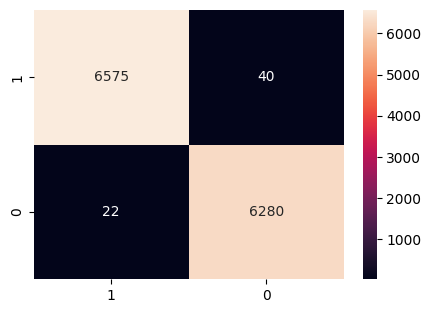





HTTP
['dport_class', 'entropy_mean_6', 'entropy_mean_9', 'entropy_mean_WE', 'entropy_std_WE', 'payload_bytes_sum_of_EW', 'pck_size_sum_of_EW', 'sport_sum', 'sum', 'TCP_ACK_ratio', 'TCP_ACK_SR', 'TCP_ACK_sum', 'TCP_flags', 'TCP_PSH_SR', 'TCP_window_mean_2', 'TCP_window_mean_6', 'TCP_window_mean_9', 'TCP_window_mean_WE', 'ts', 'ts_mean_2', 'ts_std_6', 'ts_std_WE', 'ts_sum_of_EW', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  HTTP          5    1     0  ET    0.78     0.813   0.826  0.813  0.779  0.579  0.813    0.006     0
 1  HTTP          5    1     1  ET    0.574    0.626   0.674  0.626  0.559  0.222  0.626    0.016     0
 2  HTTP          5    1     2  ET    0.81     0.838   0.842  0.838  0.81   0.632  0.838    0.006     0.001
 3  HTTP          5    1     3  ET    0.56     0.626   0.742  0.626  0.527

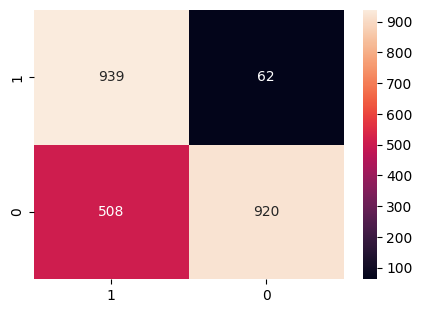





ACK
['payload_bytes_mean_WE', 'payload_bytes_sum_of_EW', 'sport_sum', 'TCP_ACK_ratio', 'TCP_ACK_SR', 'TCP_ACK_sum', 'TCP_window_sum_of_EW', 'ts_mean_6', 'ts_std_WE', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  ACK           5    1     0  ET    0.986    0.986   0.986  0.986  0.986  0.971  0.986    0.003     0.001
 1  ACK           5    1     1  ET    1        1       1      1      1      0.999  1        0.016     0
 2  ACK           5    1     2  ET    0.965    0.965   0.967  0.965  0.965  0.93   0.965    0.016     0
 3  ACK           5    1     3  ET    1        1       1      1      1      1      1        0         0
 4  ACK           5    1     4  ET    1        1       1      1      1      1      1        0         0.016
 5  ACK           5    1     5  ET    0.946    0.946   0.951  0.946  0.946  0

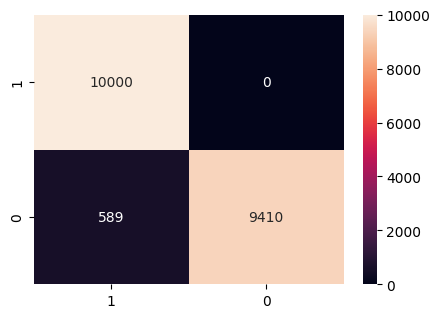





UDP
['entropy_diff', 'entropy_std_2', 'entropy_std_6', 'entropy_std_9', 'IP_DF', 'IP_flags', 'IP_proto', 'IP_tos', 'pck_size_std_6', 'Protocol', 'sport_class', 'sum', 'TCP_ACK', 'TCP_ACK_ratio', 'TCP_ACK_SR', 'TCP_ACK_sum', 'TCP_dataofs', 'TCP_flags', 'TCP_options', 'TCP_PSH_sum', 'TCP_SYN_sum', 'TCP_window', 'TCP_window_mean_2', 'TCP_window_mean_6', 'TCP_window_mean_9', 'TCP_window_mean_WE', 'TCP_window_std_WE', 'TCP_window_sum_of_EW', 'ts', 'ts_diff', 'ts_mean_2', 'ts_mean_6', 'ts_mean_9', 'ts_mean_WE', 'ts_std_2', 'ts_std_6', 'ts_std_9', 'ts_std_WE', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  UDP           5    1     0  ET    0.976    0.976   0.977  0.976  0.976  0.952  0.976    0         0.016
 1  UDP           5    1     1  ET    0.894    0.894   0.912  0.894  0.893  0.788  0.894    0.016     0

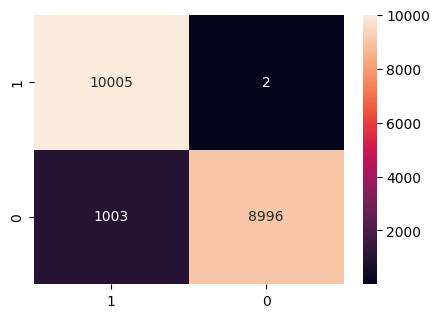





ARP
['DNS_ancount', 'DNS_arcount', 'DNS_nscount', 'DNS_qdcount', 'DNS_qr', 'DNS_ra', 'DNS_rd', 'dport_class', 'dst_IP_diversity', 'dst_port_diversity', 'entropy', 'entropy_diff', 'entropy_mean_2', 'entropy_mean_6', 'entropy_mean_9', 'entropy_mean_WE', 'entropy_std_2', 'entropy_std_6', 'entropy_std_9', 'entropy_std_WE', 'entropy_sum_of_EW', 'Ether_type', 'ICMP_code', 'ICMP_type', 'IP_DF', 'IP_flags', 'IP_frag', 'IP_ihl', 'IP_MF', 'IP_options', 'IP_proto', 'IP_tos', 'IP_ttl', 'IP_version', 'payload_bytes', 'payload_bytes_diff', 'payload_bytes_mean_2', 'payload_bytes_mean_6', 'payload_bytes_mean_9', 'payload_bytes_mean_WE', 'payload_bytes_std_2', 'payload_bytes_std_6', 'payload_bytes_std_9', 'payload_bytes_sum_of_EW', 'pck_size_diff', 'pck_size_mean_2', 'pck_size_mean_6', 'pck_size_mean_9', 'pck_size_mean_WE', 'pck_size_std_2', 'pck_size_std_6', 'pck_size_std_9', 'pck_size_std_WE', 'pck_size_sum_of_EW', 'Protocol', 'sport_class', 'sport_sum', 'TCP_ACK', 'TCP_ACK_ratio', 'TCP_ACK_sum',

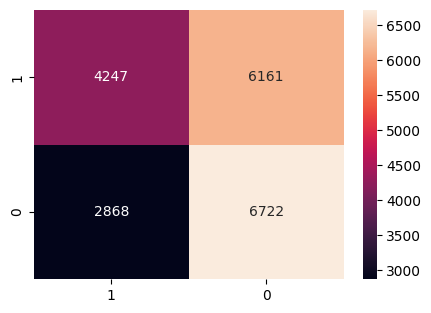





SP
['dst_IP_diversity', 'entropy_mean_WE', 'entropy_std_WE', 'entropy_sum_of_EW', 'IP_DF', 'IP_flags', 'payload_bytes_std_WE', 'sum', 'TCP_ACK', 'TCP_ACK_ratio', 'TCP_ACK_SR', 'TCP_ACK_sum', 'TCP_flags', 'TCP_SYN', 'TCP_SYN_ratio', 'TCP_SYN_SR', 'TCP_SYN_sum', 'TCP_window_mean_2', 'TCP_window_mean_6', 'TCP_window_mean_9', 'TCP_window_sum_of_EW', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SP            5    1     0  ET    1        1       1      1      1      1      1        0.012     0.002
 1  SP            5    1     1  ET    1        1       1      1      1      1      1        0.004     0.003
 2  SP            5    1     2  ET    1        1       1      1      1      1      1        0.003     0.003
 3  SP            5    1     3  ET    1        1       1      1      1      1      1        0.004  

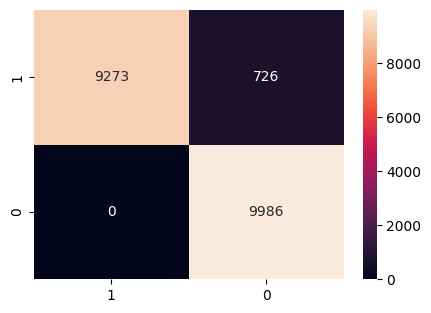





BF
['entropy_mean_6', 'entropy_mean_9', 'entropy_mean_WE', 'entropy_sum_of_EW', 'payload_bytes', 'payload_bytes_diff', 'payload_bytes_mean_2', 'payload_bytes_mean_6', 'payload_bytes_mean_9', 'payload_bytes_std_2', 'payload_bytes_std_6', 'payload_bytes_std_9', 'pck_size_diff', 'pck_size_mean_2', 'pck_size_mean_6', 'pck_size_std_2', 'pck_size_std_6', 'pck_size_std_9', 'sport_sum', 'TCP_FIN_ratio', 'TCP_FIN_SR', 'TCP_FIN_sum', 'TCP_SYN_sum', 'TCP_window_diff', 'TCP_window_mean_2', 'TCP_window_mean_6', 'TCP_window_mean_9', 'TCP_window_std_2', 'TCP_window_std_6', 'TCP_window_std_9', 'TCP_window_sum_of_EW', 'ts', 'ts_mean_9', 'ts_mean_WE', 'ts_std_6', 'ts_std_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  BF            5    1     0  ET    0.574    0.574   0.77   0.574  0.48   0.148  0.574    0         0.0

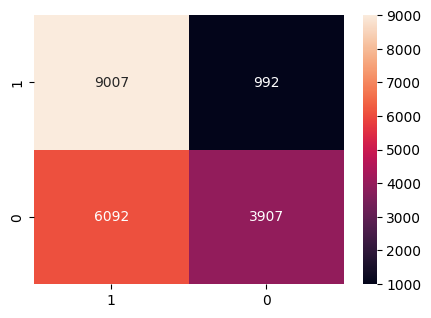





OS
['dport_class', 'dport_sum', 'dst_IP_diversity', 'dst_port_diversity', 'entropy', 'entropy_mean_2', 'entropy_mean_6', 'entropy_mean_9', 'entropy_mean_WE', 'entropy_std_2', 'entropy_std_WE', 'entropy_sum_of_EW', 'IP_ttl', 'payload_bytes_diff', 'payload_bytes_mean_6', 'payload_bytes_mean_9', 'payload_bytes_mean_WE', 'payload_bytes_std_2', 'payload_bytes_std_6', 'payload_bytes_std_WE', 'payload_bytes_sum_of_EW', 'pck_size_mean_2', 'pck_size_mean_6', 'pck_size_mean_9', 'pck_size_mean_WE', 'pck_size_std_2', 'pck_size_std_6', 'pck_size_std_9', 'pck_size_std_WE', 'pck_size_sum_of_EW', 'Protocol', 'sport_sum', 'sum', 'TCP_ACK', 'TCP_ACK_ratio', 'TCP_ACK_SR', 'TCP_ACK_sum', 'TCP_CWR', 'TCP_CWR_ratio', 'TCP_CWR_SR', 'TCP_ECE', 'TCP_ECE_ratio', 'TCP_ECE_SR', 'TCP_FIN', 'TCP_FIN_ratio', 'TCP_FIN_SR', 'TCP_FIN_sum', 'TCP_flags', 'TCP_PSH_ratio', 'TCP_PSH_SR', 'TCP_PSH_sum', 'TCP_RST_sum', 'TCP_SYN', 'TCP_SYN_ratio', 'TCP_SYN_SR', 'TCP_SYN_sum', 'TCP_URG', 'TCP_urgptr', 'TCP_URG_ratio', 'TCP_

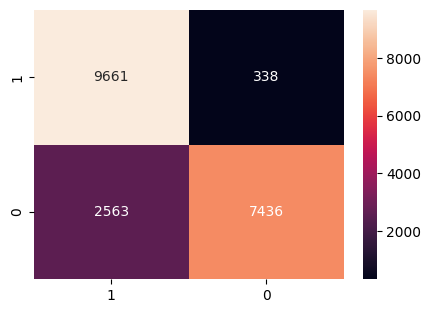





SCHD
['dport_class', 'dst_port_diversity', 'entropy_mean_WE', 'entropy_std_WE', 'entropy_sum_of_EW', 'Ether_type', 'IP_add_count', 'IP_DF', 'IP_flags', 'IP_ihl', 'IP_proto', 'IP_ttl', 'IP_version', 'payload_bytes_mean_WE', 'payload_bytes_std_WE', 'payload_bytes_sum_of_EW', 'pck_size_mean_2', 'pck_size_mean_6', 'pck_size_mean_9', 'pck_size_mean_WE', 'pck_size_std_WE', 'pck_size_sum_of_EW', 'Protocol', 'sport_class', 'sum', 'TCP_ACK', 'TCP_ACK_ratio', 'TCP_ACK_SR', 'TCP_ACK_sum', 'TCP_dataofs', 'TCP_flags', 'TCP_options', 'TCP_PSH_sum', 'TCP_window_mean_WE', 'TCP_window_sum_of_EW', 'ts', 'ts_diff', 'ts_mean_2', 'ts_mean_6', 'ts_mean_9', 'ts_mean_WE', 'ts_std_2', 'ts_std_6', 'ts_std_9', 'ts_std_WE', 'ts_sum_of_EW', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SCHD          5    1     0  ET    0.998    0.

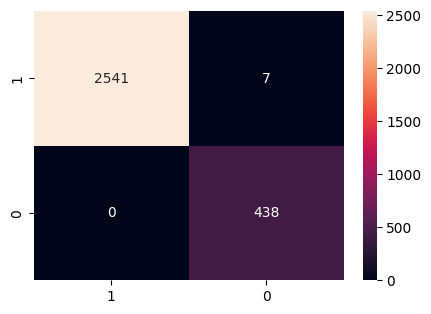





MHDis
['dport_class', 'Ether_type', 'IP_DF', 'IP_flags', 'IP_ihl', 'IP_proto', 'IP_ttl', 'IP_version', 'pck_size_mean_2', 'pck_size_mean_6', 'pck_size_mean_9', 'pck_size_mean_WE', 'pck_size_std_WE', 'pck_size_sum_of_EW', 'Protocol', 'sport_class', 'sum', 'TCP_ACK_sum', 'TCP_dataofs', 'TCP_flags', 'TCP_options', 'TCP_window_mean_WE', 'TCP_window_sum_of_EW', 'ts', 'ts_diff', 'ts_mean_2', 'ts_mean_6', 'ts_mean_9', 'ts_mean_WE', 'ts_std_2', 'ts_std_6', 'ts_std_9', 'ts_std_WE', 'ts_sum_of_EW', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  MHDis         5    1     0  ET    1        0.98    1      0.98   0.99   0.979  0.98     0         0
 1  MHDis         5    1     1  ET    0.999    0.971   0.995  0.971  0.983  0.966  0.971    0         0
 2  MHDis         5    1     2  ET    0.999    0.967   1      0.967  

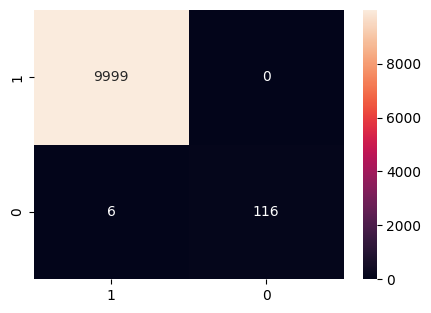

In [21]:
for file in file_list:
    print(file)
    features=feature_list[file]
    train=file_list[file][0]
    test=file_list[file][1]
    #feature,_=GA(train,test,features,gen_number=25,outputcsv=f"{file}_ET_chosed_GA_output.csv")
    feature=features
    print(feature)
    #GA_output[file]=feature
    output_csv=f"./results/beforeGA/{file}_chosed_output_ML_.csv"
    target_names=[1,0]
    ML_CV(train,test,output_csv,feature,file,5)   


In [22]:
GA_output={}

SYN


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:07<00:00,  6.72s/it]


['ts', 'IP_flags', 'IP_DF', 'TCP_SYN', 'TCP_ACK', 'sport_class', 'dst_IP_diversity', 'IP_add_count', 'pck_size_std_WE', 'pck_size_sum_of_EW', 'ts_mean_WE', 'TCP_window_std_WE', 'pck_size_mean_2', 'TCP_window_mean_2', 'TCP_SYN_sum', 'TCP_ACK_sum', 'TCP_SYN_ratio', 'TCP_ACK_ratio', 'TCP_SYN_SR', 'TCP_ACK_SR', 'pck_size_mean_6', 'ts_mean_6', 'TCP_window_mean_6', 'ts_mean_9', 'ts_std_9', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SYN           5    1     0  ET    1        1       1      1      1      0.999  1        0         0.016
 1  SYN           5    1     1  ET    0.999    0.999   0.999  0.999  0.999  0.998  0.999    0.016     0
 2  SYN           5    1     2  ET    1        1       1      1      1      0.999  1        0.008     0.002
 3  SYN           5    1     3  ET    1        

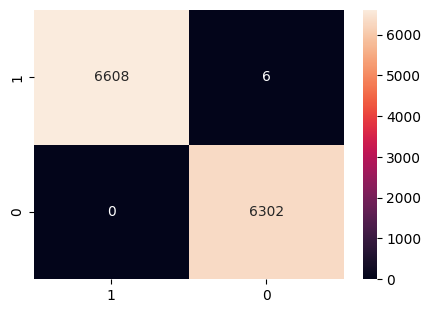





HTTP


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:32<00:00,  3.25s/it]


['TCP_flags', 'dport_class', 'pck_size_sum_of_EW', 'ts_std_WE', 'ts_sum_of_EW', 'payload_bytes_sum_of_EW', 'entropy_mean_WE', 'TCP_window_mean_2', 'sport_sum', 'TCP_ACK_ratio', 'sum', 'TCP_PSH_SR', 'ts_std_6', 'entropy_mean_6', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  HTTP          5    1     0  ET    0.9      0.915   0.902  0.915  0.899  0.8    0.915    0.005     0.001
 1  HTTP          5    1     1  ET    0.986    0.988   0.984  0.988  0.986  0.972  0.988    0.004     0
 2  HTTP          5    1     2  ET    0.886    0.903   0.892  0.903  0.886  0.774  0.903    0.006     0
 3  HTTP          5    1     3  ET    0.647    0.699   0.769  0.699  0.635  0.354  0.699    0.007     0
 4  HTTP          5    1     4  ET    0.978    0.981   0.974  0.981  0.977  0.955  0.981    0.006     0.00

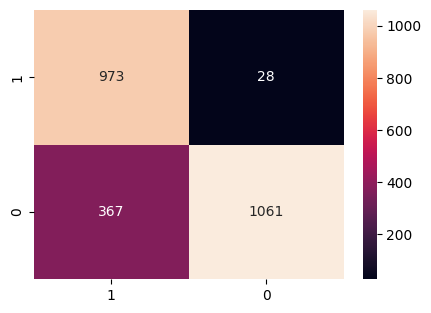





ACK


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:42<00:00,  4.22s/it]


['ts_std_WE', 'TCP_window_sum_of_EW', 'payload_bytes_mean_WE', 'payload_bytes_sum_of_EW', 'sport_sum', 'TCP_ACK_ratio', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  ACK           5    1     0  ET    0.999    0.999   0.999  0.999  0.999  0.999  0.999    0.005     0.003
 1  ACK           5    1     1  ET    0.985    0.985   0.985  0.985  0.985  0.97   0.985    0.006     0.003
 2  ACK           5    1     2  ET    1        1       1      1      1      1      1        0.006     0
 3  ACK           5    1     3  ET    1        1       1      1      1      1      1        0.005     0.003
 4  ACK           5    1     4  ET    0.998    0.998   0.998  0.998  0.998  0.997  0.998    0.005     0.001
 5  ACK           5    1     5  ET    1        1       1      1      1      1      1        0.008     0
 6  ACK        

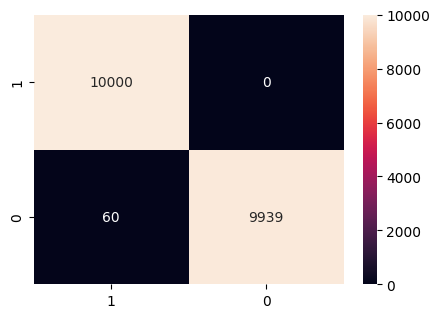





UDP


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:15<00:00,  7.52s/it]


['IP_tos', 'IP_flags', 'IP_DF', 'IP_proto', 'TCP_dataofs', 'TCP_flags', 'TCP_ACK', 'TCP_window', 'TCP_options', 'sport_class', 'Protocol', 'ts_diff', 'ts_std_WE', 'TCP_window_mean_WE', 'TCP_window_std_WE', 'TCP_window_sum_of_EW', 'ts_mean_2', 'TCP_window_mean_2', 'TCP_SYN_sum', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'sum', 'TCP_ACK_SR', 'ts_std_6', 'TCP_window_mean_6', 'entropy_std_6', 'ts_std_9', 'TCP_window_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  UDP           5    1     0  ET    0.91     0.91    0.923  0.91   0.909  0.819  0.91     0.012     0.004
 1  UDP           5    1     1  ET    0.995    0.995   0.995  0.995  0.995  0.989  0.995    0.009     0.005
 2  UDP           5    1     2  ET    0.994    0.994   0.994  0.994  0.994  0.988  0.994    0.008     0.004
 3  UDP           5    1     3  ET  

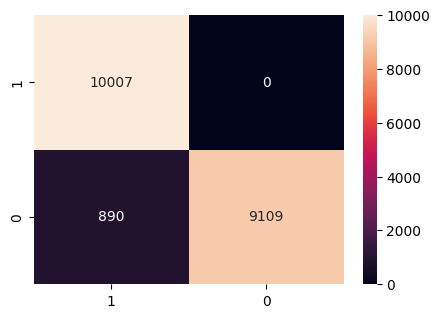





ARP


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:29<00:00, 14.95s/it]


['ts', 'IP_version', 'IP_ihl', 'IP_tos', 'IP_DF', 'IP_ttl', 'IP_options', 'ICMP_code', 'TCP_reserved', 'TCP_flags', 'TCP_URG', 'TCP_ECE', 'TCP_CWR', 'TCP_urgptr', 'TCP_options', 'UDP_len', 'DNS_rd', 'DNS_qdcount', 'DNS_ancount', 'DNS_nscount', 'dport_class', 'entropy', 'dst_IP_diversity', 'pck_size_diff', 'pck_size_std_WE', 'ts_diff', 'payload_bytes_diff', 'payload_bytes_sum_of_EW', 'entropy_diff', 'entropy_mean_WE', 'entropy_std_WE', 'entropy_sum_of_EW', 'ts_mean_2', 'ts_std_2', 'payload_bytes_mean_2', 'payload_bytes_std_2', 'entropy_std_2', 'sport_sum', 'TCP_FIN_sum', 'TCP_SYN_sum', 'TCP_RST_sum', 'TCP_ACK_sum', 'TCP_SYN_ratio', 'TCP_RST_ratio', 'TCP_PSH_ratio', 'TCP_ACK_ratio', 'TCP_CWR_ratio', 'TCP_SYN_SR', 'TCP_PSH_SR', 'TCP_ECE_SR', 'TCP_CWR_SR', 'pck_size_std_6', 'ts_mean_6', 'ts_std_6', 'TCP_window_std_6', 'payload_bytes_mean_6', 'entropy_std_6', 'pck_size_std_9', 'ts_std_9', 'TCP_window_std_9', 'payload_bytes_mean_9', 'entropy_mean_9', 'entropy_std_9', 'Label']
    Dataset    

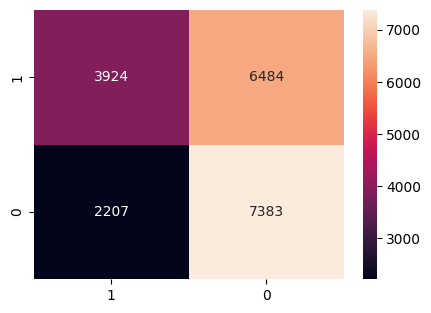





SP


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:44<00:00,  4.44s/it]


['IP_flags', 'IP_DF', 'TCP_flags', 'TCP_SYN', 'TCP_ACK', 'dst_IP_diversity', 'entropy_std_WE', 'entropy_sum_of_EW', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'TCP_ACK_SR', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SP            5    1     0  ET    1        1       1      1      1      1      1        0         0
 1  SP            5    1     1  ET    1        1       1      1      1      1      1        0.005     0
 2  SP            5    1     2  ET    1        1       1      1      1      1      1        0.016     0
 3  SP            5    1     3  ET    1        1       1      1      1      1      1        0         0
 4  SP            5    1     4  ET    0.999    0.999   0.999  0.999  0.999  0.998  0.999    0         0
 5  SP            5    1     5  ET    1        1       1      1      1      1      1        0

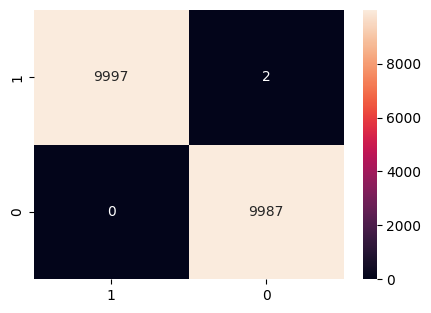





BF


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:00<00:00,  6.05s/it]


['ts', 'TCP_window_sum_of_EW', 'entropy_mean_WE', 'pck_size_std_2', 'TCP_window_mean_2', 'TCP_window_std_2', 'payload_bytes_mean_2', 'sport_sum', 'TCP_FIN_sum', 'TCP_FIN_SR', 'pck_size_mean_6', 'pck_size_std_6', 'ts_std_6', 'TCP_window_mean_6', 'TCP_window_std_6', 'payload_bytes_mean_6', 'payload_bytes_std_6', 'ts_mean_9', 'ts_std_9', 'TCP_window_mean_9', 'TCP_window_std_9', 'payload_bytes_mean_9', 'payload_bytes_std_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  BF            5    1     0  ET    0.544    0.544   0.758  0.544  0.425  0.088  0.544    0.016         0
 1  BF            5    1     1  ET    0.839    0.839   0.878  0.839  0.835  0.678  0.839    0             0
 2  BF            5    1     2  ET    0.782    0.782   0.83   0.782  0.773  0.563  0.782    0.016         0
 3  BF            5    1  

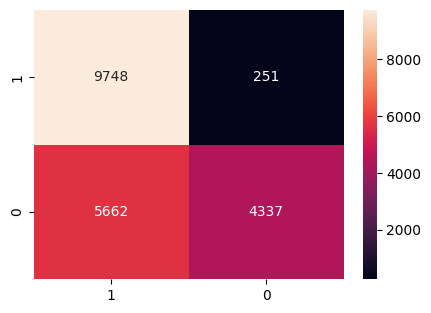





OS


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:25<00:00,  8.59s/it]


['TCP_flags', 'TCP_SYN', 'TCP_ACK', 'TCP_URG', 'TCP_window', 'TCP_urgptr', 'UDP_len', 'entropy', 'Protocol', 'dst_port_diversity', 'pck_size_mean_WE', 'pck_size_std_WE', 'ts_diff', 'ts_std_WE', 'ts_sum_of_EW', 'TCP_window_std_WE', 'payload_bytes_diff', 'payload_bytes_mean_WE', 'payload_bytes_std_WE', 'entropy_mean_WE', 'entropy_std_WE', 'entropy_sum_of_EW', 'ts_mean_2', 'payload_bytes_std_2', 'dport_sum', 'TCP_SYN_sum', 'TCP_PSH_sum', 'TCP_ACK_sum', 'TCP_URG_sum', 'TCP_FIN_ratio', 'TCP_PSH_ratio', 'TCP_ACK_ratio', 'sum', 'TCP_FIN_SR', 'TCP_SYN_SR', 'TCP_PSH_SR', 'TCP_ACK_SR', 'TCP_URG_SR', 'TCP_ECE_SR', 'TCP_CWR_SR', 'pck_size_mean_6', 'pck_size_std_6', 'ts_mean_6', 'ts_std_6', 'payload_bytes_mean_6', 'entropy_mean_6', 'pck_size_mean_9', 'ts_mean_9', 'payload_bytes_mean_9', 'entropy_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  ----

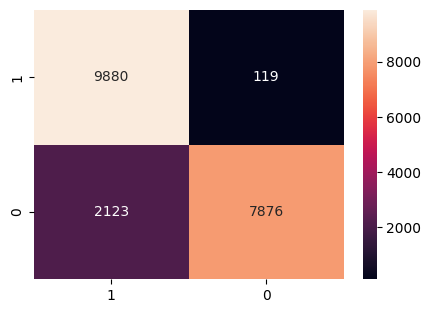





SCHD


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:30<00:00,  3.08s/it]


['ts', 'Ether_type', 'IP_version', 'IP_ihl', 'TCP_dataofs', 'TCP_flags', 'TCP_ACK', 'TCP_options', 'sport_class', 'dport_class', 'pck_size_sum_of_EW', 'ts_mean_WE', 'ts_sum_of_EW', 'TCP_window_mean_WE', 'TCP_window_sum_of_EW', 'payload_bytes_mean_WE', 'payload_bytes_std_WE', 'payload_bytes_sum_of_EW', 'entropy_std_WE', 'TCP_PSH_sum', 'TCP_ACK_sum', 'TCP_ACK_ratio', 'sum', 'pck_size_mean_6', 'ts_mean_6', 'ts_std_6', 'pck_size_mean_9', 'ts_mean_9', 'ts_std_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  SCHD          5    1     0  ET    0.995    0.983   0.996  0.983  0.989  0.978  0.983    0         0
 1  SCHD          5    1     1  ET    1        1       0.999  1      0.999  0.999  1        0         0
 2  SCHD          5    1     2  ET    1        1       0.999  1      0.999  0.999  1        0         0


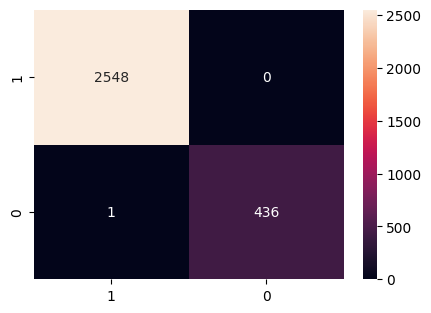





MHDis


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:34<00:00,  3.49s/it]


['ts', 'IP_version', 'IP_flags', 'IP_proto', 'TCP_dataofs', 'TCP_options', 'sport_class', 'dport_class', 'Protocol', 'pck_size_mean_WE', 'pck_size_std_WE', 'ts_mean_WE', 'ts_sum_of_EW', 'TCP_window_sum_of_EW', 'ts_mean_2', 'ts_std_2', 'pck_size_mean_6', 'ts_mean_6', 'pck_size_mean_9', 'ts_mean_9', 'Label']
    Dataset      SW    T    CV  ML      Acc    b_Acc    Prec    Rec     F1    kap    ROC    tra-T    test-T
--  ---------  ----  ---  ----  ----  -----  -------  ------  -----  -----  -----  -----  -------  --------
 0  MHDis         5    1     0  ET        1    0.996   0.996  0.996  0.996  0.992  0.996    0         0
 1  MHDis         5    1     1  ET        1    0.988   0.992  0.988  0.99   0.979  0.988    0         0
 2  MHDis         5    1     2  ET        1    1       0.988  1      0.994  0.988  1        0         0.016
 3  MHDis         5    1     3  ET        1    0.996   0.996  0.996  0.996  0.992  0.996    0         0
 4  MHDis         5    1     4  ET        1    0.996   1

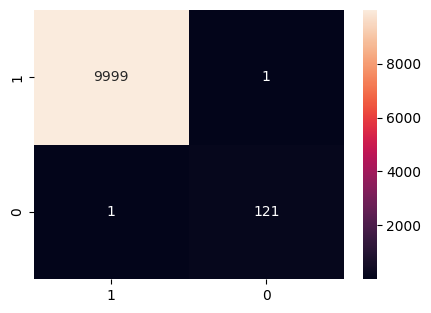

In [23]:
for file in file_list:
    print(file)
    features=feature_list[file]
    train=file_list[file][0]
    test=file_list[file][1]
    feature,_=GA(train,test,features,gen_number=10,outputcsv=f"./results/afterGA/{file}_ET_chosed_GA_output.csv")
    
    print(feature)
    GA_output[file]=feature
    output_csv=f"./results/afterGA/{file}_chosed_output_ML_.csv"
    target_names=[1,0]
    ML_CV(train,test,output_csv,feature,file,5)   


In [24]:
with open('GA_output_ET.json', 'w') as fp:
    json.dump(GA_output, fp)

In [25]:
#!shutdown /s /t 360

In [26]:
import winsound
duration = 1000  # milliseconds
freq = 440  # Hz
winsound.Beep(freq, duration)